In [53]:
#from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statistics
from scipy.stats import mannwhitneyu

import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

#drive.mount('/content/drive')



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A16,A17,A18,A19,A20,A21,Class
0,0.965176,0.205893,0.371268,1.058586,2.608605,0.737786,1.744109,0.707633,0.245169,-0.602487,...,-1.741239,-0.145067,-0.847895,-1.574146,-0.992756,0.352426,0.514080,-0.481683,-0.660502,1
1,0.737460,-0.281418,1.974538,-0.563874,1.777726,0.256334,2.096939,2.736971,-0.545666,-0.200142,...,-0.597099,-1.403606,-0.041951,0.167803,-0.061392,1.271704,-0.444420,-0.605118,-0.510073,1
2,-0.242710,0.829652,-1.477958,0.846606,0.341908,0.751542,0.578511,0.424798,-1.082562,0.001031,...,-1.003084,0.863155,0.497411,1.970282,0.754454,-0.460149,0.911948,0.040544,0.222010,1
3,-1.282284,-0.086494,-0.184411,0.642780,-0.809661,-0.403942,0.175277,-1.349990,-1.343755,-2.668375,...,0.148437,-0.200693,-0.463522,1.277538,1.902414,0.787441,1.798109,0.980552,-0.309503,1
4,0.687956,-0.846700,2.730626,1.458086,0.954135,1.212360,2.084338,2.051097,0.680490,0.712872,...,-1.224531,-0.930785,-0.699105,-1.876801,-0.494584,-0.722800,-1.511430,0.733681,-0.510073,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.757546,0.683458,-1.186454,-0.466037,-1.553079,-1.559426,-0.379170,-0.501486,-1.242180,-0.548325,...,0.598711,0.591978,0.813589,1.351520,-0.277988,0.237517,0.884821,-0.567138,0.382466,3
4996,0.757261,-0.437358,-1.432411,-0.922609,-0.423375,-0.892271,-2.319733,-2.035864,-1.662991,0.596811,...,2.237415,2.177320,1.892314,1.015237,0.415120,1.501523,0.731099,-1.393206,-0.800901,3
4997,1.123587,-1.480205,0.589896,-1.778681,-0.343203,-1.318700,-1.053327,-1.003517,0.528128,1.239016,...,1.189235,0.216502,-0.234138,1.284264,-0.184130,-0.517604,-2.053977,0.230444,0.342352,3
4998,-0.876355,0.108431,-0.603447,-2.349396,1.413305,-1.621326,-1.242343,-2.212635,-1.024519,-1.554188,...,0.576567,1.475041,1.024374,1.829043,1.339264,0.532999,0.197594,0.477315,-1.783698,3


Valores totais: 


Class
3    1696
1    1657
2    1647
Name: count, dtype: int64

<Axes: >

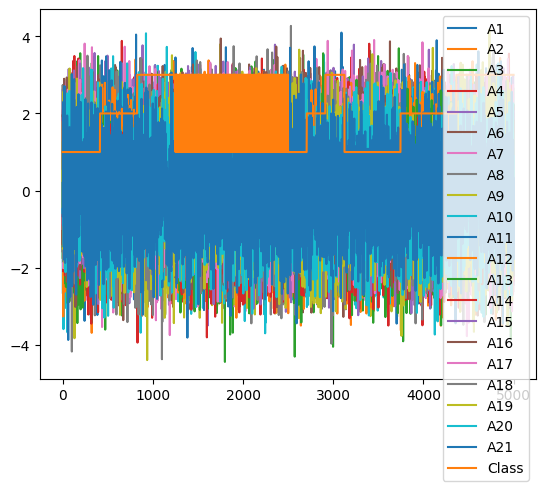

In [54]:
import pandas as pd
#df = pd.read_csv('drive/MyDrive/Datasets/HeartDisease.csv')


#df = pd.read_csv('Datasets/Wine.csv', sep=',', header=None)
#primeira_coluna = df[0]
#df = df.drop(0, axis=1)
#df[0] = primeira_coluna

#df = pd.read_csv('Datasets/HeartDisease.csv')
#df = pd.read_csv('Datasets/Wine.csv')
#df = pd.read_csv('Datasets/Mammo.csv')
#df = pd.read_csv('drive/MyDrive/Datasets/WDVG.csv')
df = pd.read_csv('WDVG.csv')
display(df)




print('Valores totais: ')
display((df.iloc[:, -1]).value_counts())

df.plot()

In [55]:

x = df.iloc[:, :-1]  # Todos exceto a última coluna
y = df.iloc[:, -1]   # última coluna

# 70% para treinamento - 15% para validação - 15% para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5, random_state=42)
x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_teste, y_teste, test_size=0.5)



<h2> KNN: variação do valor do K <h2>






In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Defina os hiperparâmetros que deseja otimizar
param_grid = {
    'n_neighbors': list(range(1, 50)),  # Valores de k
    'weights': ['uniform', 'distance'],  # Tipo de ponderação
    'metric': ["euclidean", "manhattan"]  # Métrica de distância (1 para distância Manhattan, 2 para distância Euclidiana)
}

best_accuracy = 0  # melhor acurácia
best_paramsKNN = {}  # melhores hiperparâmetros

loop = 0
for n_neighbors in param_grid['n_neighbors']:
    for weights in param_grid['weights']:
        for metric in param_grid['metric']:
            knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
            knn.fit(x_treino, y_treino)
            opiniao = knn.predict(x_validacao)
            accuracy = accuracy_score(y_validacao, opiniao)
            #print("Acc: ", accuracy)

            if accuracy > best_accuracy:

                best_accuracy = accuracy
                best_paramsKNN = {
                    'n_neighbors': n_neighbors,
                    'weights': weights,
                    'metric': metric
                }

print(f"Melhores Hiperparâmetros: {best_paramsKNN}")
print("Acc: ", best_accuracy)



Melhores Hiperparâmetros: {'n_neighbors': 49, 'weights': 'uniform', 'metric': 'euclidean'}
Acc:  0.872


<h2> AD:<h2>
<h4> maior profundidade,
número mínimo de chaves por folha,
critério (gini ou entropy)<h4>


In [57]:
from sklearn.tree import DecisionTreeClassifier


param_grid = {
    'max_depth': list(range(1, 21)),  # profundidade da árvore (
    'min_samples_leaf': list(range(1, 11)),  # Número mínimo de amostras por folha
    'criterion': ['gini', 'entropy']  # Critério divisão da árvore
}

best_accuracy = 0  # melhor acurácia
best_paramsAD = {}  # melhores hiperparâmetros


for max_depth in param_grid['max_depth']:
    for min_samples_leaf in param_grid['min_samples_leaf']:
        for criterion in param_grid['criterion']:
            dt_classifier = DecisionTreeClassifier(max_depth=max_depth,
                                                   min_samples_leaf=min_samples_leaf,
                                                   criterion=criterion,
                                                   )
            
            dt_classifier.fit(x_treino, y_treino)
            opiniao = dt_classifier.predict(x_validacao)
            accuracy = accuracy_score(y_validacao, opiniao)

            if accuracy > best_accuracy:

                best_accuracy = accuracy
                best_paramsAD = {
                    'max_depth': max_depth,
                    'min_samples_leaf': min_samples_leaf,
                    'criterion': criterion
                    }





print(f"Melhores Hiperparâmetros: {best_paramsAD}")
print("Melhor Acurácia: ", best_accuracy)



Melhores Hiperparâmetros: {'max_depth': 7, 'min_samples_leaf': 10, 'criterion': 'entropy'}
Melhor Acurácia:  0.7744


<h2> Naive Bayes: <h1>
<h5>não usa parâmetros<h5>



In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

naive_bayes = GaussianNB()

grid_search = GridSearchCV(estimator=naive_bayes, param_grid={}, scoring='accuracy')
grid_search.fit(x_treino, y_treino)

melhor_naive_bayes = grid_search.best_estimator_

opiniao = melhor_naive_bayes.predict(x_validacao)


matriz_confusao = confusion_matrix(y_validacao, opiniao)



acuracia = accuracy_score(y_validacao, opiniao)
print(f"Acurácia: {acuracia:.2f}")


Acurácia: 0.84


<h2>
SVM:
<h2>
<h5>tipo do kernel (linear, rbf, polinomial, sigmoid), variação do erro C (entre 0.1 e 1)
<h5>

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Defina os hiperparâmetros que deseja otimizar
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Tipo de kernel
    'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0]  # Variação do parâmetro C
}

best_accuracy = 0  # melhor acurácia
best_paramsSVM = {}  # melhores hiperparâmetros

loop = 0
for kernel in param_grid['kernel']:
    for C in param_grid['C']:
        svm = SVC(kernel=kernel, C=C)
        svm.fit(x_treino, y_treino)
        opiniao = svm.predict(x_validacao)
        accuracy = accuracy_score(y_validacao, opiniao)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_paramsSVM = {
                'kernel': kernel,
                'C': C
            }

print("Melhores Hiperparâmetros:", best_paramsSVM)
print("Melhor Acuracia: ", best_accuracy )



Melhores Hiperparâmetros: {'kernel': 'rbf', 'C': 0.25}
Melhor Acuracia:  0.8792


<h2> MLP: <h2>
<h5>número de épocas,taxa de aprendizagem, função de ativação (relu, sigmoid, tangente hiperbólica, logística) e número de camadas escondidas <h5>

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Defina o param_grid com as combinações de hiperparâmetros
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,)],
    'activation': ['relu', 'logistic', 'tanh', 'identity'],
    'solver': ['adam'],
    'max_iter': [100, 200, 300],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

best_accuracy = 0
best_paramsMLP = {}

# Itere sobre as combinações de hiperparâmetros
for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
    for activation in param_grid['activation']:
        for max_iter in param_grid['max_iter']:
            for learning_rate_init in param_grid['learning_rate_init']:
                # Crie um classificador MLP com os hiperparâmetros
                mlp = MLPClassifier(
                    hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation,
                    solver='adam',
                    max_iter=max_iter,
                    learning_rate_init=learning_rate_init
                )

                mlp.fit(x_treino, y_treino)

                opiniao = mlp.predict(x_validacao)

                accuracy = accuracy_score(y_validacao, opiniao)

                # Verifique se a acurácia é a melhor até agora
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_paramsMLP = {
                        'hidden_layer_sizes': hidden_layer_sizes,
                        'activation': activation,
                        'max_iter': max_iter,
                        'learning_rate_init': learning_rate_init
                    }

# Exiba os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", best_paramsMLP)
print("Melhor Acuracia: ", best_accuracy )





Melhores Hiperparâmetros: {'hidden_layer_sizes': (10,), 'activation': 'logistic', 'max_iter': 200, 'learning_rate_init': 0.001}
Melhor Acuracia:  0.8752


In [61]:

print(best_paramsKNN)
knn = KNeighborsClassifier(
                n_neighbors=best_paramsKNN['n_neighbors'],
                weights=best_paramsKNN['weights'],
                metric=best_paramsKNN['metric']
                )
knn.fit(x_treino, y_treino)
opiniao = knn.predict(x_validacao)
accuracy = accuracy_score(y_validacao, opiniao)
print("KNN: ", accuracy)


print(best_paramsAD)
arvoreDecisao = DecisionTreeClassifier(
                    max_depth=best_paramsAD['max_depth'],
                    min_samples_leaf=best_paramsAD['min_samples_leaf'],
                    criterion=best_paramsAD['criterion']
                )
arvoreDecisao.fit(x_treino, y_treino)
opiniao = arvoreDecisao.predict(x_validacao)
accuracy = accuracy_score(y_validacao, opiniao)
print("AD: ",accuracy)

naive_bayes = GaussianNB()
grid_search = GridSearchCV(estimator=naive_bayes, param_grid={}, scoring='accuracy')
grid_search.fit(x_treino, y_treino)
nBayes = grid_search.best_estimator_
opiniao = nBayes.predict(x_validacao)
accuracy = accuracy_score(y_validacao, opiniao)
print("Naive Bayes:", accuracy)


print(best_paramsSVM)
svm = SVC(
        kernel=best_paramsSVM['kernel'],
        C=best_paramsSVM['C'],
        probability=True
        )
svm.fit(x_treino, y_treino)
opiniao = svm.predict(x_validacao)
accuracy = accuracy_score(y_validacao, opiniao)
print("SVM: ",accuracy)


print(best_paramsMLP)
mlp = MLPClassifier(
                    hidden_layer_sizes=best_paramsMLP['hidden_layer_sizes'],
                    activation=best_paramsMLP['activation'],
                    solver='adam',
                    max_iter=best_paramsMLP['max_iter'],
                    learning_rate_init=best_paramsMLP['learning_rate_init']
                )
mlp.fit(x_treino, y_treino)
opiniao = mlp.predict(x_validacao)
accuracy = accuracy_score(y_validacao, opiniao)
print("MLP: ",accuracy)


{'n_neighbors': 49, 'weights': 'uniform', 'metric': 'euclidean'}
KNN:  0.872
{'max_depth': 7, 'min_samples_leaf': 10, 'criterion': 'entropy'}
AD:  0.7744
Naive Bayes: 0.8408
{'kernel': 'rbf', 'C': 0.25}
SVM:  0.8792
{'hidden_layer_sizes': (10,), 'activation': 'logistic', 'max_iter': 200, 'learning_rate_init': 0.001}
MLP:  0.872


In [62]:
acuracia_melhor_knn=[]
acuracia_melhor_arvore = []
acuracia_melhor_svm = []
acuracia_melhor_mlp = []
acuracia_naive_bayes = []

proba_knn = []
proba_arvore = [] 
proba_svm = []
proba_mlp = []
proba_nb = []

for i in range(20):
    #O conjunto de teste mantém-se o mesmo
    x_treino, x_resto, y_treino, y_resto = train_test_split(x, y, test_size=0.5, stratify=y, shuffle=True)
    
    #Treina cada classificador com os melhores parâmentros obtidos anteriormente e executa sobre o conjunto de teste

    #KNN
    knn.fit(x_treino, y_treino)
    pred = knn.predict(x_teste)  
    acuracia_melhor_knn.append(accuracy_score(y_teste, pred))
    proba_knn.append(knn.predict_proba(x_teste))
 
    #Árvore de decisão
    arvoreDecisao.fit(x_treino, y_treino) 
    pred = arvoreDecisao.predict(x_teste)
    acuracia_melhor_arvore.append(accuracy_score(y_teste, pred))
    proba_arvore.append(arvoreDecisao.predict_proba(x_teste)) 

    #SVM
    svm.fit(x_treino, y_treino)
    pred = svm.predict(x_teste)
    acuracia_melhor_svm.append(accuracy_score(y_teste, pred))
    proba_svm.append(svm.predict_proba(x_teste))

    #MLP
    mlp.fit(x_treino, y_treino)
    pred = mlp.predict(x_teste)
    acuracia_melhor_mlp.append(accuracy_score(y_teste, pred))
    proba_mlp.append(svm.predict_proba(x_teste))

    #NaiveBayes
    nb = GaussianNB()
    nb.fit(x_treino, y_treino)
    pred = nb.predict(x_teste)
    acuracia_naive_bayes.append(accuracy_score(y_teste, pred))
    proba_nb.append(nb.predict_proba(x_teste))

In [63]:
#printa todas as acurácias
print("\nAcurácias KNN:")
print(acuracia_melhor_knn)
print("Maior acurácia = ",acuracia_melhor_knn[np.argmax(acuracia_melhor_knn)])

print("\nAcurácias Árvore de Decisão:")
print(acuracia_melhor_arvore)
print("Maior acurácia = ",acuracia_melhor_arvore[np.argmax(acuracia_melhor_arvore)])

print("\nAcurácias Naive Bayes:")
print(acuracia_naive_bayes)
print("Maior acurácia = ",acuracia_naive_bayes[np.argmax(acuracia_naive_bayes)])  

print("\nAcurácias SVM:")
print(acuracia_melhor_svm)
print("Maior acurácia = ",acuracia_melhor_svm[np.argmax(acuracia_melhor_svm)])

print("\nAcurácias MLP:")
print(acuracia_melhor_mlp)
print("Maior acurácia = ",acuracia_melhor_mlp[np.argmax(acuracia_melhor_mlp)])




Acurácias KNN:
[0.8344, 0.8472, 0.8344, 0.8416, 0.8416, 0.8352, 0.8344, 0.8328, 0.8424, 0.8552, 0.8448, 0.8368, 0.8424, 0.8568, 0.844, 0.836, 0.836, 0.8464, 0.8392, 0.836]
Maior acurácia =  0.8568

Acurácias Árvore de Decisão:
[0.8064, 0.8104, 0.8232, 0.8104, 0.7944, 0.8168, 0.8088, 0.8184, 0.8112, 0.8104, 0.8024, 0.8128, 0.8208, 0.7976, 0.8208, 0.8096, 0.8168, 0.8192, 0.8264, 0.78]
Maior acurácia =  0.8264

Acurácias Naive Bayes:
[0.8064, 0.804, 0.8064, 0.804, 0.8064, 0.804, 0.8024, 0.8048, 0.8088, 0.8072, 0.808, 0.8048, 0.8056, 0.804, 0.812, 0.8056, 0.8064, 0.8064, 0.8088, 0.8072]
Maior acurácia =  0.812

Acurácias SVM:
[0.8696, 0.8608, 0.8648, 0.8576, 0.8728, 0.86, 0.8576, 0.8616, 0.864, 0.8696, 0.8768, 0.864, 0.872, 0.868, 0.8688, 0.8608, 0.8592, 0.8712, 0.8648, 0.8672]
Maior acurácia =  0.8768

Acurácias MLP:
[0.8712, 0.8728, 0.872, 0.868, 0.8672, 0.864, 0.8648, 0.8688, 0.8656, 0.864, 0.864, 0.868, 0.8704, 0.864, 0.8688, 0.8744, 0.8664, 0.872, 0.864, 0.8712]
Maior acurácia =  0.8

In [70]:
#Calcula a média e o desvio padrão para as 20 repetições de cada classificador

#KNN
media_knn = statistics.mean(acuracia_melhor_knn)
desviop_knn = statistics.pstdev(acuracia_melhor_knn)
print("\nKNN\nMedia = ",media_knn,"\nDesvio padrão = ",desviop_knn)

#arvore de decisão
media_arvore = statistics.mean(acuracia_melhor_arvore)
desviop_arvore = statistics.pstdev(acuracia_melhor_arvore)
print("\nÁrvore de Decisão\nMedia = ",media_arvore,"\nDesvio padrão = ",desviop_arvore)

#Naive Bayes
media_nb = statistics.mean(acuracia_naive_bayes)
desviop_nb = statistics.pstdev(acuracia_naive_bayes)
print("\nNaive Bayes\nMedia = ",media_nb,"\nDesvio padrão = ",desviop_nb)

#SVM
media_svm = statistics.mean(acuracia_melhor_svm)
desviop_svm = statistics.pstdev(acuracia_melhor_svm)
print("\nSVM\nMedia = ",media_svm,"\nDesvio padrão = ",desviop_svm)

#MLP
media_mlp = statistics.mean(acuracia_melhor_mlp)
desviop_mlp = statistics.pstdev(acuracia_melhor_mlp)
print("\nMLP\nMedia = ",media_mlp,"\nDesvio padrão = ",desviop_mlp)


medias = {
    'KNN': media_knn,
    'Árvore de Decisão': media_arvore,
    'MLP': media_mlp,
    'Naive Bayes': media_nb,
    'SVM': media_svm
}

# Encontre a chave (nome) com o maior valor usando a função max()
melhor_modelo = max(medias, key=medias.get)

# Imprima o nome do modelo com a maior média
print("\nO modelo com a maior média é:", melhor_modelo)


KNN
Media =  0.84088 
Desvio padrão =  0.006611021101161298

Árvore de Decisão
Media =  0.81084 
Desvio padrão =  0.010698710202636578

Naive Bayes
Media =  0.80616 
Desvio padrão =  0.0021331666601557414

SVM
Media =  0.86556 
Desvio padrão =  0.005333516663515735

MLP
Media =  0.86808 
Desvio padrão =  0.0033361055139188825

O modelo com a maior média é: MLP


## Multiplos Classificadores

In [85]:
acuracias_regra_soma=[]
for i in range(20):
    pred_soma = []
    sum1 = sum2 = 0
    for j in range(75):
        sum1 = proba_knn[i][j][0] + proba_arvore[i][j][0] + proba_svm[i][j][0] + proba_mlp[i][j][0] + proba_nb[i][j][0]
        sum2 = proba_knn[i][j][1] + proba_arvore[i][j][1] + proba_svm[i][j][1] + proba_mlp[i][j][1] + proba_nb[i][j][1]
        if sum1 >= sum2:
            pred_soma.append(1)
        else:
            pred_soma.append(2)
    print(pred_soma)

    acuracias_regra_soma.append(accuracy_score(y_teste,pred_soma))

print("Acurácias múltiplos classificadores com regra da soma:")
print(*acuracias_regra_soma, sep=' | ')
print("Maior acurácia = ",acuracias_regra_soma[np.argmax(acuracias_regra_soma)])
media_regra_soma = statistics.mean(acuracias_regra_soma)
print("Média das acurácias = ",media_regra_soma)
desviop_regra_soma = statistics.pstdev(acuracias_regra_soma)
print("Desvio padrão das acurácias = ",desviop_regra_soma)

[2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1]


ValueError: Found input variables with inconsistent numbers of samples: [1250, 75]